## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [1]:
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from IPython.display import Image
import pydotplus 
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def draw_decesion_tree(model, dataset):
#     f = export_graphviz(model, out_file='tree.dot') # save dot
    dot_data = export_graphviz(model, out_file=None, 
                 feature_names = dataset.feature_names,  
                 class_names = dataset.target_names,  
                 filled=True, rounded=True,  
                 special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    display(Image(graph.create_png()))

def data(dataset, is_regression, title=None):
    print('\n-----------------------------\n')
    if title is not None:
        print(title.upper())
        print()
    print('data shape:', dataset.data.shape)
    print('target shape:', dataset.target.shape)
    
    alpha=0.3
    
    X = dataset.data
    x_train, x_test, y_train, y_test = train_test_split(X, dataset.target, test_size=0.1, random_state=4)
    print('x_train', x_train[0])
    print('y_train', y_train[0])
    print('x_test', x_test[0])
    print('y_test', y_test[0])
    print()
    
    if is_regression:
        model = linear_model.LinearRegression()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print('LinearRegression:')
        print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
        print()
        
        model = DecisionTreeRegressor(criterion='mse', max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=0)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print('DecisionTreeRegressor:')
        print('tree score:', model.score(x_test,y_test))
        print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
#         draw_decesion_tree(model, dataset)
        print()
        
        model = linear_model.Lasso(alpha=alpha)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print('Lasso:')
        print('coef:', model.coef_)
        print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
        print()
        
        model = linear_model.Ridge(alpha=alpha)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print('Ridge:')
        print('coef:', model.coef_)
        print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
    else:
        model = linear_model.LogisticRegression(penalty='l2',solver='newton-cg',multi_class='multinomial')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print('LogisticRegression:')
        print("r2_score: %.2f"% r2_score(y_test, y_pred))
        print('accuracy_score: %.2f'% accuracy_score(y_test, y_pred))
        print()
        
        model = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=2, min_samples_leaf=1, random_state=0)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print('DecisionTreeClassifier:')
        print('tree score:', model.score(x_test,y_test))
        print("r2_score: %.2f"% r2_score(y_test, y_pred))
        print('accuracy_score: %.2f'% accuracy_score(y_test, y_pred))
        draw_decesion_tree(model, dataset)
        print()
        
        model = linear_model.Lasso(alpha=alpha)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print('Lasso:')
        print('coef:', model.coef_)
        print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
        print()
        
        model = linear_model.Ridge(alpha=alpha)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print('Ridge:')
        print('coef:', model.coef_)
        print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
    print('\n-----------------------------\n')


-----------------------------

DIABETES

data shape: (442, 10)
target shape: (442,)
x_train [-0.04547248 -0.04464164 -0.04824063 -0.01944209 -0.00019301 -0.01603186
  0.06704829 -0.03949338 -0.02479119  0.01963284]
y_train 111.0
x_test [-0.04183994 -0.04464164 -0.04931844 -0.03665645 -0.00707277 -0.02260797
  0.08545648 -0.03949338 -0.06648815  0.00720652]
y_test 128.0

LinearRegression:
Mean squared error: 2840.79

Lasso:
coef: [   0.          -22.82715548  468.76672804  227.45875148   -0.
   -0.         -143.55479216    0.          432.98182649    0.        ]
Mean squared error: 2507.10

Ridge:
coef: [  37.08745798 -175.93194406  398.75453773  280.09166714  -39.2997111
  -68.87331336 -185.39255521  156.77469227  349.25117774  107.66055713]
Mean squared error: 2796.37

-----------------------------


-----------------------------

BREAST_CANCER

data shape: (569, 30)
target shape: (569,)
x_train [1.026e+01 1.471e+01 6.620e+01 3.216e+02 9.882e-02 9.159e-02 3.581e-02
 2.037e-02 1.633e-

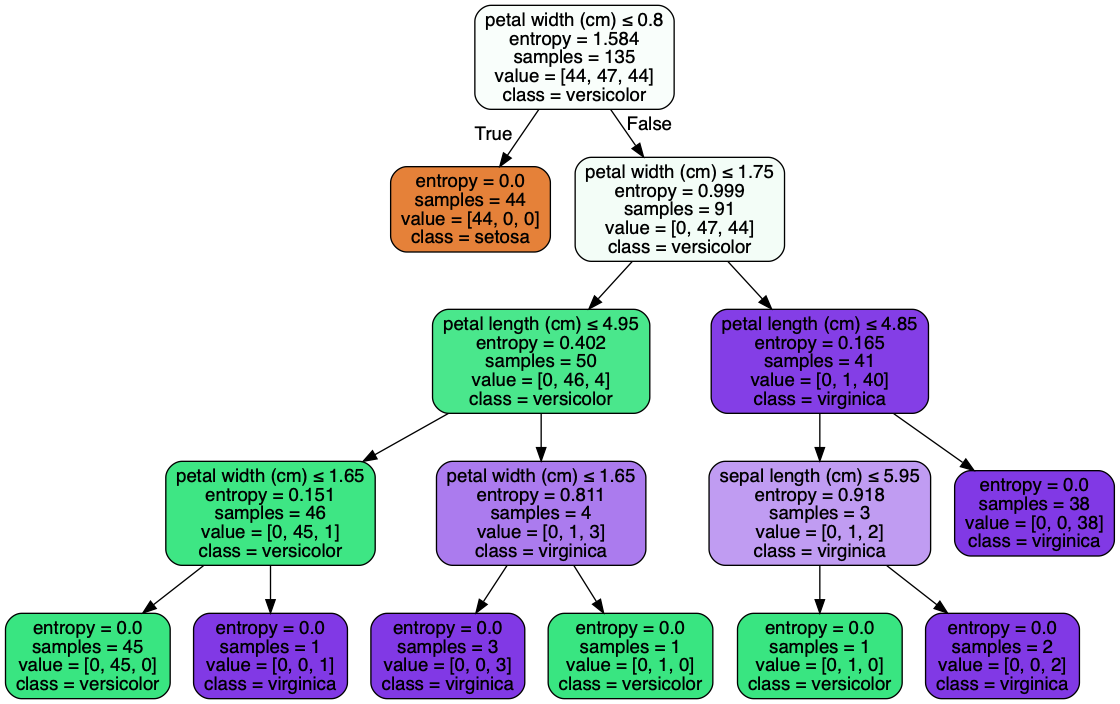


Lasso:
coef: [ 0.        -0.         0.3424714  0.       ]
Mean squared error: 0.10

Ridge:
coef: [-0.14332497 -0.02644141  0.25296946  0.58462076]
Mean squared error: 0.07

-----------------------------


-----------------------------

WINE

data shape: (178, 13)
target shape: (178,)
x_train [1.229e+01 2.830e+00 2.220e+00 1.800e+01 8.800e+01 2.450e+00 2.250e+00
 2.500e-01 1.990e+00 2.150e+00 1.150e+00 3.300e+00 2.900e+02]
y_train 1
x_test [1.296e+01 3.450e+00 2.350e+00 1.850e+01 1.060e+02 1.390e+00 7.000e-01
 4.000e-01 9.400e-01 5.280e+00 6.800e-01 1.750e+00 6.750e+02]
y_test 2

LogisticRegression:
r2_score: 1.00
accuracy_score: 1.00

DecisionTreeClassifier:
tree score: 0.8888888888888888
r2_score: 0.83
accuracy_score: 0.89


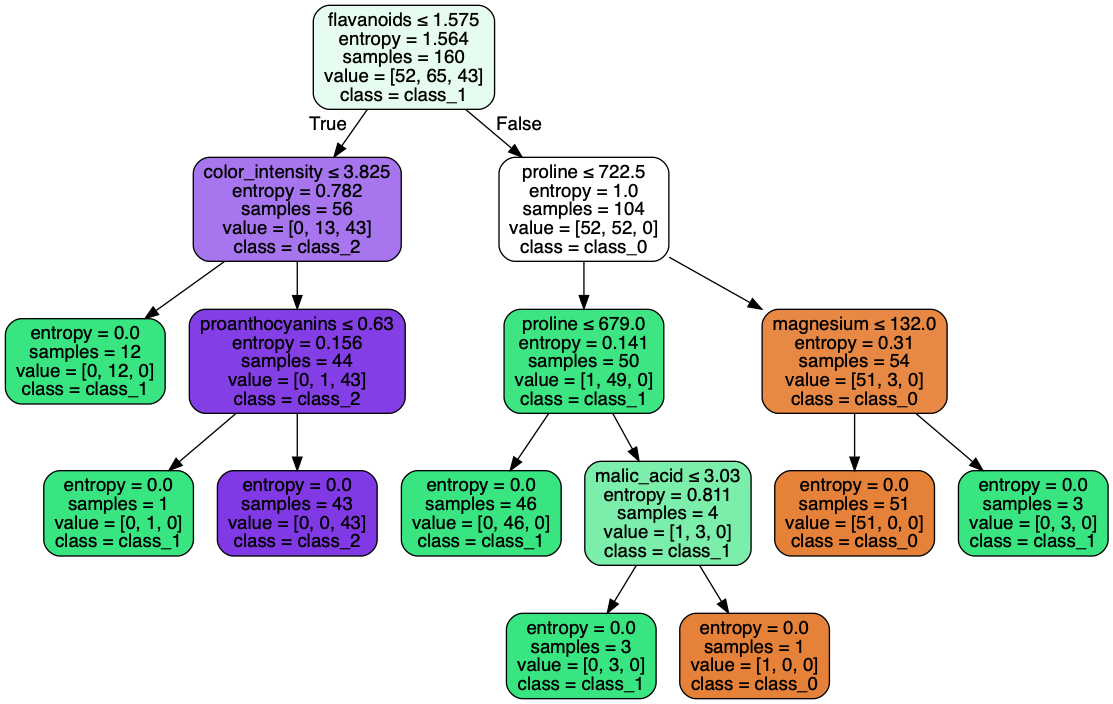


Lasso:
coef: [-0.          0.         -0.          0.01642287  0.         -0.
 -0.04397539  0.         -0.          0.09925361 -0.         -0.
 -0.00167324]
Mean squared error: 0.21

Ridge:
coef: [-1.04175699e-01  2.95474626e-02 -1.78340037e-01  4.28135487e-02
  2.05010485e-04  1.40554934e-01 -3.63996459e-01 -2.09774658e-01
  4.09347533e-02  7.53328026e-02 -1.52969954e-01 -2.60264383e-01
 -7.48612614e-04]
Mean squared error: 0.07

-----------------------------



In [3]:
diabetes = datasets.load_diabetes()
data(diabetes, True, 'diabetes')

breast_cancer = datasets.load_breast_cancer()
data(breast_cancer, True, 'breast_cancer')

iris = datasets.load_iris()
data(iris, False, 'iris')

wine = datasets.load_wine()
data(wine, False, 'wine')